# **CH.SC.U4CSE23239 - Decision Tree - Example**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn
from google.colab import files

uploaded = files.upload()
data = pd.read_csv('diabetes.csv')

Saving diabetes.csv to diabetes.csv


In [ ]:
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[feature_cols]
y = data.Outcome

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(614, 7)

(614,)

(154, 7)

(154,)

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('y_pred: ',y_pred)

y_pred:  [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1
 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 1]


In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matirx : ',conf_mat)
Accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score : ', Accuracy_score)
print('Accuracy in Percentage : ' ,int(Accuracy_score*100),'%')

Confusion matirx :  [[89 11]
 [28 26]]
Accuracy score :  0.7467532467532467
Accuracy in Percentage :  74 %


<Axes: xlabel='Predicted', ylabel='Actual'>

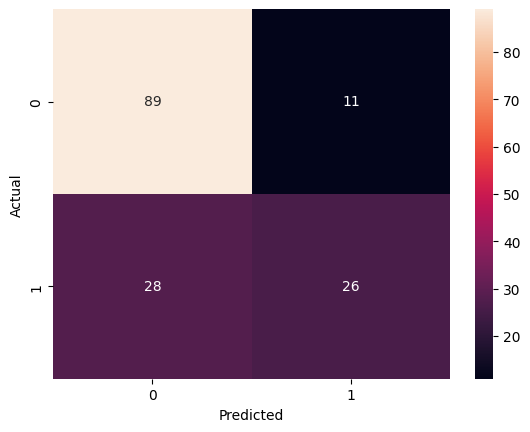

In [ ]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)